# DETECTING DEPRESSION USING MACHINE LEARNING MODEL

# About the project:
   The objective of this project is to develop a machine learning model capable of  detecting depression based on various features extracted from living conditions of people in rural areas. The model aims to provide a reliable tool for early detection of depression, facilitating timely intervention and support for individuals at risk. Additionally, the project seeks to explore the potential of ML techniques in mental health assessment and contribute to the development of scalable and accessible solutions for mental health screening and monitoring.




### Objective:

   Develop a machine learning model to predict the likelihood of depression based on demographic conditions of individuals in rural areas.


# APPROACH 

#### Data Collection:
Data includes demographic information and depression status. 

#### Data Preprocessing:
Handle missing values: Remove incomplete records.
Encode categorical variables: Convert categorical variables into numerical representations using techniques like one-hot encoding.

#### Exploratory Data Analysis (EDA):
Explore the relationships between demographic features and depression status, and, also, amongst the other variables.
Identify correlations, patterns, and potential confounding factors.
Visualize the data using line plots, bar plots and histograms.

#### Model Selection:
Choose appropriate Machine Learning algorithms for binary classification task.

#### Model Training:
Train the selected ML models on the training data.
Use cross-validation to evaluate model performance and tune hyperparameters.
Experiment with different model architectures and preprocessing techniques.

#### Model Evaluation:

Evaluate the trained models on the testing data using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).
Compare the performance of different models.



## IMPORTING LIBRARIES

#### numpy : it is used for numerical operations in Python.
#### pandas : for data manipulation and analysis.
#### StandardScaler: For data preprocessing
#### sklearn.decomposition PCA: Import the PCA class from scikit-learn for performing Principal Component Analysis.
#### matplotlib: Import the matplotlib library for creating plots and visualizations.
#### seaborn: Import the seaborn library for improved data visualization.
#### train_test_split: module from sklearn to split the dataset into training and testing sets.
#### GrisdSearchCV: module from sklearn for hyperparameter tuning
#### accuracy_score, confusion_matrix, precision_score, recall_score: Import metrics for evaluating the classifier's performance.

In [1]:
import os
import numpy as np
import pandas as pd 


from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset

In [2]:
filepath = "b_depressed.csv"
depressedData = pd.read_csv(filepath)
depressedData

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,255,22,1,25,1,1,7,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1425,547,69,1,28,1,4,10,6,15711078,24023054,...,0,1,0,0,23022095,1021536,0,1823477,47384361.0,0
1426,893,184,1,66,0,0,1,1,42440731,22861940,...,0,1,0,0,12545373,10454478,0,46444572,10454478.0,1
1427,363,75,1,51,1,1,12,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0


# Exploring the dataset

In [3]:
depressedData.sample(5)


,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
1189,1321,250,1,24,1,2,11,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
1146,433,25,1,67,0,0,1,1,32831509,22861940,...,1,0,0,0,30028818,48046112,1,58287693,48046112.0,1
481,888,127,1,43,1,6,6,9,28912201,32671356,...,0,0,1,1,18017291,41706693,0,65342712,19487035.0,0
300,942,79,1,56,1,7,14,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
232,791,144,0,65,0,1,10,3,35524435,21941057,...,0,1,0,0,10676913,54986105,0,6339118,28453974.0,0


In [4]:
depressedData.head()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


In [5]:
depressedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey_id              1429 non-null   int64  
 1   Ville_id               1429 non-null   int64  
 2   sex                    1429 non-null   int64  
 3   Age                    1429 non-null   int64  
 4   Married                1429 non-null   int64  
 5   Number_children        1429 non-null   int64  
 6   education_level        1429 non-null   int64  
 7   total_members          1429 non-null   int64  
 8   gained_asset           1429 non-null   int64  
 9   durable_asset          1429 non-null   int64  
 10  save_asset             1429 non-null   int64  
 11  living_expenses        1429 non-null   int64  
 12  other_expenses         1429 non-null   int64  
 13  incoming_salary        1429 non-null   int64  
 14  incoming_own_farm      1429 non-null   int64  
 15  inco

# Exploratory data analysis

In [6]:
correlation_matrix = depressedData.corr()

target_correlation = correlation_matrix['depressed'].sort_values(ascending=False)
print("Correlation coefficients with respect to the target variable 'depressed':" )
print(target_correlation)

Correlation coefficients with respect to the target variable 'depressed':
depressed                1.000000
Age                      0.105721
no_lasting_investmen     0.051973
durable_asset            0.040505
total_members            0.035056
Ville_id                 0.028954
other_expenses           0.017117
incoming_own_farm        0.013161
save_asset               0.009059
lasting_investment       0.004136
Number_children          0.003823
sex                     -0.003519
incoming_salary         -0.003929
gained_asset            -0.004402
farm_expenses           -0.004901
Survey_id               -0.005960
labor_primary           -0.012825
incoming_agricultural   -0.019147
incoming_no_business    -0.025496
incoming_business       -0.028158
living_expenses         -0.028213
Married                 -0.062155
education_level         -0.098043
Name: depressed, dtype: float64


#### From the correlation coefficients with respect to the target variable ( 'depressed'), we can observe the following:

#### Positive Correlation: Features with positive correlation coefficients are positively associated with the target variable indicating higher values of these features tend to be associated with depression.
           Age: There is a positive correlation between age and depression, indicating that older individuals may be more     likely to experience depression.
           No lasting investment, durable asset, total members, and Ville_id: These features also show positive correlations with depression, suggesting that factors related to financial stability and household size may influence depression risk.

#### Negative Correlation: Features with negative correlation coefficients are negatively associated with the target variable('depressed')  indicating lower values of these features tend to be associated with depression.
            Education level: There is a negative correlation between education level and depression, indicating that higher education levels may be associated with lower depression risk.
            Married: Being married shows a negative correlation with depression, suggesting that marital status may influence depression risk.

#### Weak Correlation: Features with correlation coefficients close to zero have weak associations with the target variable('depressed').
             Features like sex, incoming_salary, gained_asset, and farm_expenses have correlation coefficients close to zero, indicating weak associations with depression.

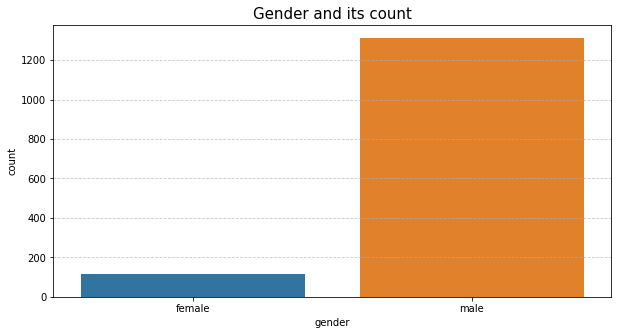

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(data=depressedData, x=('sex'))
plt.xticks([0, 1], ['female', 'male'])
plt.xlabel('gender')
plt.ylabel('count')
plt.title('Gender and its count', fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


This code plots the count of 'female' and 'male using 'countplot'. x- axis gives the gender and y-axis gives the count of each. The number of males as compared to female is quite high

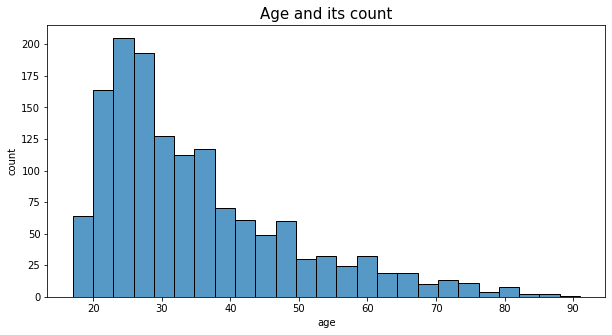

In [8]:
plt.figure(figsize=(10,5))
sns.histplot(data=depressedData, x='Age')
plt.xlabel('age')
plt.ylabel('count')
plt.title('Age and its count', fontsize=15)
plt.show()

This code plots the histogram of 'age' and its count. X-axis has the age column and is divided into discrete age groups having an equal interval of ten. Y-axis gives the count of people in the various age groups. The highest population lies in the age group between 20 to 30.

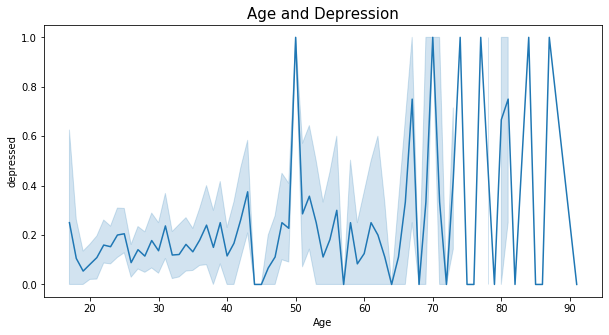

In [9]:
plt.figure(figsize=(10,5))
sns.lineplot(y='depressed',x='Age', data=depressedData)
plt.title('Age and Depression', fontsize=15)
plt.show()
plt.show()

This code uses 'lineplot' to show the relation between the variables 'Age' and 'depressed'. 'Age' plotted along X-axis is the independent variable and 'depressed' plotted along Y-axis is the dependent variable. Age and depression are non-linearly related. Depression in individuals peaks and drops in the various age groups.Although, it is seen that depression is less in the age below 50 and starts having peaks from 50 to 90 age range

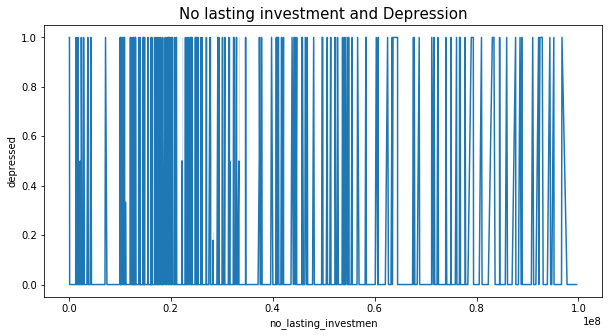

In [10]:
plt.figure(figsize=(10,5))
sns.lineplot(y='depressed',x='no_lasting_investmen', data=depressedData)
plt.title('No lasting investment and Depression', fontsize=15)
plt.show()


#### This code uses lineplot to show the relation between the feature 'no_lasting_investmen' and 'depressed'. It can be observed that the variables are non-linearly related.

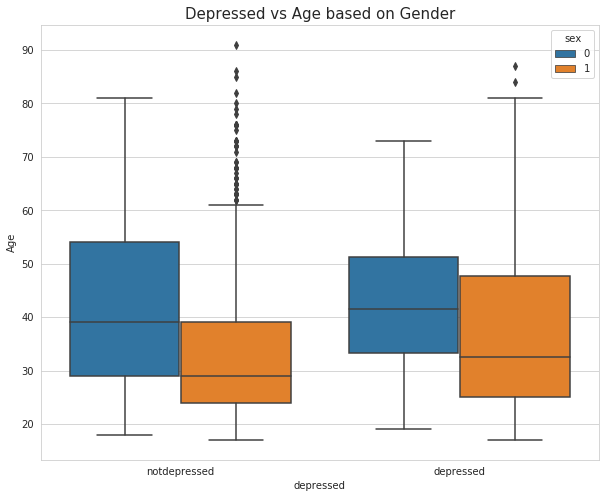

In [11]:
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
sns.boxplot(data=depressedData, x='depressed', y='Age', hue='sex')
plt.xticks([0,1],['notdepressed','depressed'])
plt.title('Depressed vs Age based on Gender', fontsize=15)
plt.show()


#### This code uses 'boxplot' to visualise how 'Age' is distributed using quartiles among depressed and non-depressed individuals also based on another variable 'sex'.It shows the minimum, maximum, median, first quartile, third quartile and outliers in the dataset
       The variable 'depressed' is plotted on the X-axis. This variable contains binary values indicating whether individuals are depressed or non-depressed.The variable 'Age' is plotted on the Y-axis. The 'hue' parameter adds another dimension to the plot by colouring the boxes based on the values of the 'sex' column indicating the gender of the individuals.
       It can be observed that
 #### Non-depressed females have 
 Minimum age- around 18, Maximum age-around 82, Median- around 39, Q1-30-39,Q3-39-55, Outliers- No
 #### Non-depressed males have-
 Minimum age- around 17, Maximum age-around 61, Median- around 29, Q1-24-29,Q3-29-39, Outliers- Yes
 #### Depressed Females have-
 Minimum age- around 19, Maximum age-around 73, Median- around 42, Q1-34-42,Q3-42-51, Outliers- No
 #### Depressed males have- 
 Minimum age- around 17, Maximum age-around 80, Median- around 32, Q1-25-32,Q3-32-48, Outliers- Yes

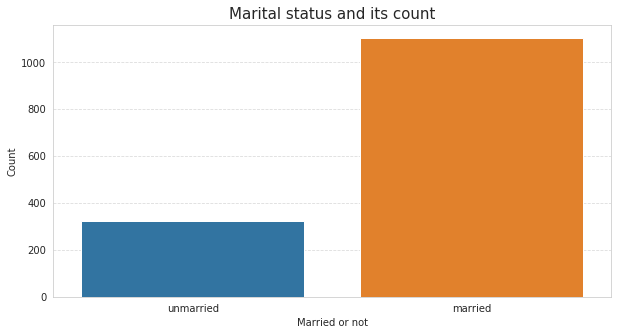

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(data=depressedData, x='Married')
plt.xticks([0, 1], ['unmarried', 'married'])
plt.xlabel('Married or not')
plt.ylabel('Count')
plt.title("Marital status and its count", fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### This code uses 'countplot' to count the number of married and unmarried individuals in the dataset. X-axis is plotted with the variable'married' and Y-axis gives its count. It is observed that the number of married individuals is quite high compared to unmarried individuals.

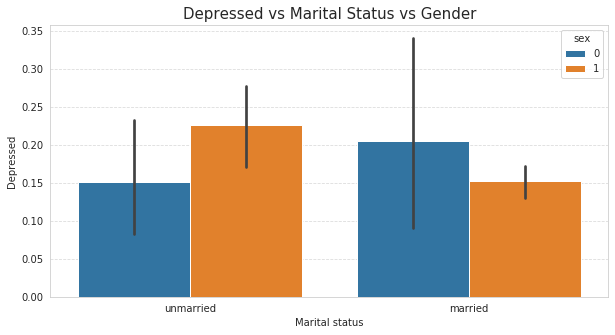

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(x='Married',y='depressed',hue='sex',data=depressedData)
plt.xticks([0,1],['unmarried','married'])
plt.title('Depressed vs Marital Status vs Gender', fontsize=15)
plt.xlabel('Marital status')
plt.ylabel('Depressed')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
 

#### This code uses 'barplot' to show the prevalence of depression based on the marital status of individuals. Another dimension is added based on the 'sex' column which further categorises 'married' and 'unmarried' into 'female' and male'. 
   It is observed that more number of married females are depressed than unmarried while unmarried males are more depressed than married.

In [14]:
depressedData.incoming_salary.value_counts()

0    1172
1     257
Name: incoming_salary, dtype: int64

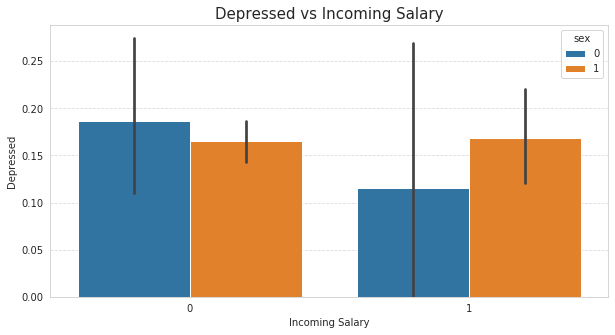

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(x='incoming_salary',y='depressed',hue ='sex', data=depressedData)
plt.title('Depressed vs Incoming Salary', fontsize=15)
plt.xlabel('Incoming Salary')
plt.ylabel('Depressed')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### This code uses 'barplot' to show the prevalence of depression based on the incoming salary of individuals. Another dimension is added based on the 'sex' column which further categorises incoming salary or not into 'female' and male'. 
  It is observed that females with no incoming salary are more depressed than females with incoming salary. There is no significant difference in males.

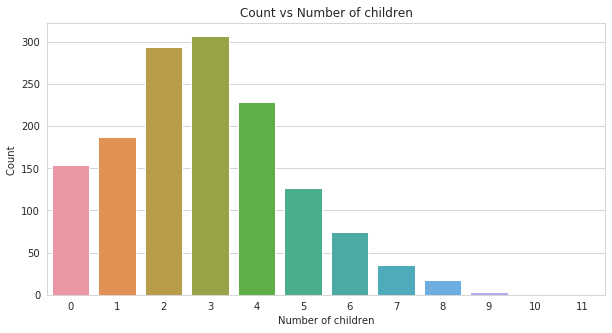

In [16]:
plt.figure(figsize=(10,5))
df = pd.DataFrame(depressedData)
Number_children_counts = df['Number_children'].value_counts()
sns.barplot(x=Number_children_counts.index, y=Number_children_counts.values)
plt.title('Count vs Number of children')
plt.xlabel('Number of children')
plt.ylabel('Count ')
plt.show()

#### The above code uses 'barplot'. A pandas series is created containing the counts of unique values in the column 'Number_children'. X-axis is plotted with the index of the series while Y-axis gives the counts of each index representing the count of individuals.

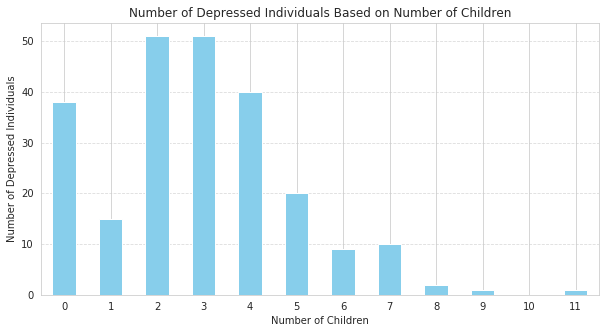

In [17]:
plt.figure(figsize=(10,5))
depressed_counts = depressedData.groupby('Number_children')['depressed'].sum()
depressed_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Number of Children')
plt.ylabel('Number of Depressed Individuals')
plt.title('Number of Depressed Individuals Based on Number of Children')
plt.xticks(rotation=0)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

#### Here, the data is grouped by 'number_of_children' on X-axis and the 'number of depressed individuals in each group' is summed up and plotted on Y-axis. Barplot is used to represent the data.
            It is observed that individuals having 2 and 3 children have the highest count of depressed individuals. More number of children does lead to more number of depressed individuals.

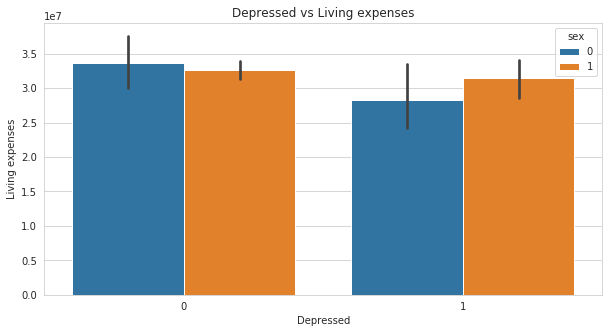

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(x='depressed',y='living_expenses',hue='sex', data=depressedData)
plt.title('Depressed vs Living expenses')
plt.xlabel('Depressed')
plt.ylabel('Living expenses')
plt.show()

#### This code uses a barplot to show the relation between 'depressed' and 'living expenses'. Another dimension is added based on the 'sex' column which further categorises the depressed column based on 'male' and 'female'. 
   It is observed that females who are not depressed have higher living expenses than depressed ones while there is no significant difference in the living expenses of males.

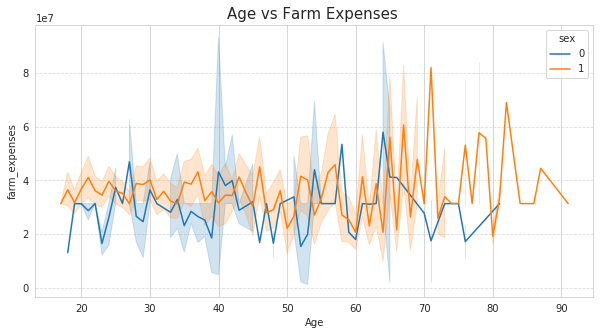

In [19]:
plt.figure(figsize=(10,5))
sns.lineplot(data=depressedData, x='Age', y='farm_expenses',hue='sex')
plt.title('Age vs Farm Expenses ', fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()


#### This code uses lineplot to show the relation between the variables 'Age' and 'Farm expenses' based on another dimension 'Sex. 
       It is observed that males in the older age range have higher farm expenses than the ones in the lower age range. The farm expenses of females are comparatively lower than that of males.

# Data preprocessing

In [20]:
depressedData.isnull().sum()

Survey_id                 0
Ville_id                  0
sex                       0
Age                       0
Married                   0
Number_children           0
education_level           0
total_members             0
gained_asset              0
durable_asset             0
save_asset                0
living_expenses           0
other_expenses            0
incoming_salary           0
incoming_own_farm         0
incoming_business         0
incoming_no_business      0
incoming_agricultural     0
farm_expenses             0
labor_primary             0
lasting_investment        0
no_lasting_investmen     20
depressed                 0
dtype: int64

# Dropping the rows having null values

In [21]:
depressedData.drop(depressedData[(depressedData['no_lasting_investmen'].isnull())].index, axis = 0, inplace = True)
depressedData.isnull().sum()

Survey_id                0
Ville_id                 0
sex                      0
Age                      0
Married                  0
Number_children          0
education_level          0
total_members            0
gained_asset             0
durable_asset            0
save_asset               0
living_expenses          0
other_expenses           0
incoming_salary          0
incoming_own_farm        0
incoming_business        0
incoming_no_business     0
incoming_agricultural    0
farm_expenses            0
labor_primary            0
lasting_investment       0
no_lasting_investmen     0
depressed                0
dtype: int64

### Encoding the categorical variables 'Ville_id' and 'education_level'

In [22]:
depressedData = pd.get_dummies(depressedData, columns=['Ville_id', 'education_level'])

 This function from the Pandas library is used to create dummy/indicator variables for categorical columns in the dataset. It creates new columns for each category and assigns binary values based on whether the original data had the category or not. 
          After this operation, the dataframe 'depressedData' will have additional columns corresponding to unique values in 'Ville-id' and 'education_level' columns, effectively encoding them as dummy variables.

### Getting the statistical data

In [23]:
depressedData.describe()

,Survey_id,sex,Age,Married,Number_children,total_members,gained_asset,durable_asset,save_asset,living_expenses,...,education_level_9,education_level_10,education_level_11,education_level_12,education_level_13,education_level_14,education_level_16,education_level_17,education_level_18,education_level_19
count,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1.409000e+03,1.409000e+03,1.409000e+03,1.409000e+03,...,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000
mean,715.808375,0.918382,34.733854,0.774308,2.904897,4.996451,3.360588e+07,2.707096e+07,2.744453e+07,3.248661e+07,...,0.207949,0.301632,0.031228,0.042583,0.012775,0.048261,0.002129,0.002129,0.001419,0.000710
std,413.394322,0.273879,13.800712,0.418186,1.872585,1.772778,2.007839e+07,1.804276e+07,1.778911e+07,2.101274e+07,...,0.405984,0.459129,0.173995,0.201988,0.112342,0.214394,0.046110,0.046110,0.037662,0.026641
min,1.000000,0.000000,17.000000,0.000000,0.000000,1.000000,3.251120e+05,1.625560e+05,1.729660e+05,2.629190e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,356.000000,1.000000,25.000000,1.000000,2.000000,4.000000,2.312976e+07,1.929852e+07,2.339998e+07,2.103352e+07,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,717.000000,1.000000,31.000000,1.000000,3.000000,5.000000,2.891220e+07,2.286194e+07,2.339998e+07,2.669228e+07,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1075.000000,1.000000,42.000000,1.000000,4.000000,6.000000,3.717283e+07,2.634528e+07,2.339998e+07,3.870381e+07,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1429.000000,1.000000,91.000000,1.000000,11.000000,12.000000,9.912755e+07,9.961560e+07,9.992676e+07,9.929528e+07,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Scaling the data

In [24]:
cols = depressedData.columns.values
large_data = [i for i in cols if depressedData[i].mean() > 10000]
scaler = StandardScaler()
df_std = scaler.fit_transform(depressedData[large_data])
depressedData[large_data]= df_std 
large_data

['gained_asset',
 'durable_asset',
 'save_asset',
 'living_expenses',
 'other_expenses',
 'incoming_agricultural',
 'farm_expenses',
 'lasting_investment',
 'no_lasting_investmen']

The column names of the dataframe 'depressedData' are stored in the variable 'cols'. A list 'large_data is created which contains the column names for which the mean value is greater than 10000. Standard Scaler is used to scale the data in the list 'large_data' by fitting the scaler to the data and transforming it. It replaces the the original value in the selected columns i.e large_data with their standardised counterparts.

In [25]:
depressedData

,Survey_id,sex,Age,Married,Number_children,total_members,gained_asset,durable_asset,save_asset,living_expenses,...,education_level_9,education_level_10,education_level_11,education_level_12,education_level_13,education_level_14,education_level_16,education_level_17,education_level_18,education_level_19
0,926,1,28,1,4,5,-0.233851,-0.233363,-0.227442,-0.275851,...,0,1,0,0,0,0,0,0,0,0
1,747,1,23,1,3,5,-0.233851,-0.233363,-0.227442,-0.275851,...,0,0,0,0,0,0,0,0,0,0
2,1190,1,22,1,3,5,-0.233851,-0.233363,-0.227442,-0.275851,...,1,0,0,0,0,0,0,0,0,0
3,1065,1,27,1,2,4,0.949678,-0.408733,1.248573,-1.527659,...,0,1,0,0,0,0,0,0,0,0
4,806,0,59,0,4,6,2.441322,-0.538818,-0.227442,2.303754,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,255,1,25,1,1,5,-0.233851,-0.233363,-0.227442,-0.275851,...,0,0,0,0,0,0,0,0,0,0
1425,547,1,28,1,4,6,-0.891563,-0.168987,-0.671321,-1.047826,...,0,1,0,0,0,0,0,0,0,0
1426,893,1,66,0,0,1,0.440174,-0.233363,-0.274531,-0.949344,...,0,0,0,0,0,0,0,0,0,0
1427,363,1,51,1,1,5,-0.233851,-0.233363,-0.227442,-0.275851,...,0,0,0,1,0,0,0,0,0,0


#### Dropping columns 'depressed' and 'Survey_id' from input X. Assigning target variable 'depressed' to y

In [26]:
X = depressedData.drop(['depressed','Survey_id'], axis = 1)
y = depressedData['depressed']

In [27]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (1409, 292)
Shape of y: (1409,)


# Model BUILDING
   For all the models the dataset is split into train: test ratio of 75:25 and random value is set to 100. 
   The performance metrics used across all models are accuracy, precision score, recall score, ROC-AUC.

## K-NEAREST NEIGHBOURS

In [28]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



knn = KNeighborsClassifier()


param_grid = {
    'n_neighbors': [3, 5, 7, 9],  
    'weights': ['uniform', 'distance'],  
    'p': [1, 2]  
}


clf_knn = GridSearchCV(knn, param_grid, cv=5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)


best_clf_knn = clf_knn.fit(X_train, y_train)


best_model = best_clf_knn.best_estimator_

best_params = best_clf_knn.best_params_
print("Best Hyperparameters:", best_params)
print("_______________________________________________")

print("TRAIN RESULT:\n================================================")
y_train_pred= best_clf_knn.predict(X_train)
train_accuracy= accuracy_score(y_train,y_train_pred)*100
print (f'Accuracy for Training data :' , train_accuracy)

print("_______________________________________________")


print("TEST RESULT:\n================================================")

y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)*100
print(f"Accuracy for Test data:", test_accuracy)

print("_______________________________________________")

print("CONFUSION MATRIX:\n================================================")
print(confusion_matrix(y_test, y_pred))

print("_______________________________________________")


precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

print("Precision :", precision)


print("Recall :", recall)

Best Hyperparameters: {'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
_______________________________________________
TRAIN RESULT:
Accuracy for Training data : 82.76515151515152
_______________________________________________
TEST RESULT:
Accuracy for Test data: 85.26912181303116
_______________________________________________
CONFUSION MATRIX:
[[298   4]
 [ 48   3]]
_______________________________________________
Precision : 0.42857142857142855
Recall : 0.058823529411764705


#### The accuracy on both train and test set is moderately good. The recall value is very low.

In [29]:
from sklearn.model_selection import cross_val_score


cv_scores = cross_val_score(best_model, X, y, cv=5)


print("Cross-Validation Scores:", cv_scores)


mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print("Mean CV score:", mean_cv_score)
print("Standard deviation of CV scores:", std_cv_score)


Cross-Validation Scores: [0.83333333 0.81914894 0.81914894 0.82978723 0.80427046]
Mean CV score: 0.8211377804699529
Standard deviation of CV scores: 0.010158365725281176


In [30]:
class_names = ['Not Depressed', 'Depressed']

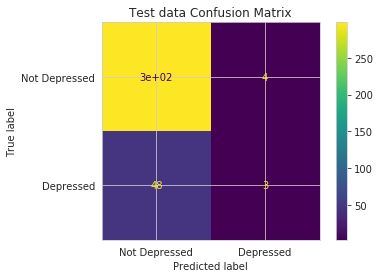

In [31]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(best_clf_knn, X_test, y_test,  values_format = '.5g', display_labels=class_names)
plt.title("Test data Confusion Matrix")
plt.show()

#### Performance metric - Precision & Recall
For a machine learning model to detect depression, both precision and recall are vital. But their importance vary depending on the application. In this medical context, misdiagnosing individuals as depressed (False Positive) will lead to unnecessary treatment while on the other hand, failing to correctly classify individuals as depressed will aggravate their mental health condition. Therefore, a balance between precision and recall is important but ,in this scenario, prioritising recall to minimise False Negatives is more critical


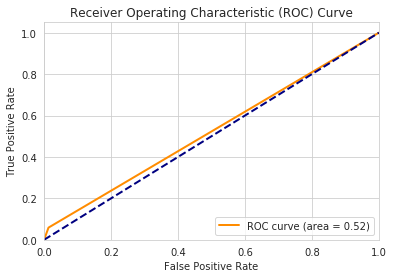

In [32]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [33]:
#Adjusting the threshold to increase recall
y_pred_proba = best_model.predict_proba(X_test)[:,1]


threshold = 0.1

y_pred_adjusted = (y_pred_proba >= threshold).astype(int)


precision = precision_score(y_test, y_pred_adjusted)
recall = recall_score(y_test, y_pred_adjusted)

print("Precision with adjusted threshold:", precision)
print("Recall with adjusted threshold:", recall)


Precision with adjusted threshold: 0.15767634854771784
Recall with adjusted threshold: 0.7450980392156863


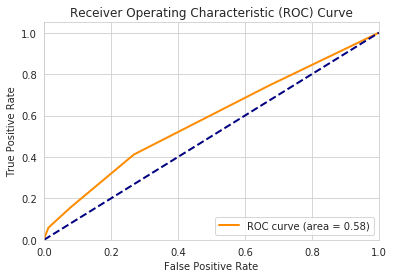

In [34]:
#Plotting ROC curve with adjusted values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)


y_pred_adjusted = (y_pred_proba >= threshold).astype(int)


roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### The model is able to achieve moderately good accuracy on both training and testing dataset. But is not able to classify True Positives well. The recall value is quite low. So, the threshold is being adjusted to increase the recall. Since, recall in more critical in this medical scenario. The AUC value was 0.52 and increased to 0.58 after threshold adjustment which indicates that the model's ability to distinguish classes is only slightly better than random and the  model may struggle to correctly classify instances.

## SVC with PCA and feature importance

In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)



pca = PCA(n_components=10)  
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

svc = SVC(kernel='linear',random_state=100)
svc.fit(X_train_pca, y_train)


feature_selection = SelectFromModel(svc, prefit=True)
X_train_selected = feature_selection.transform(X_train_pca)
X_test_selected = feature_selection.transform(X_test_pca)

param_grid = {
    'C': [0.1, 1, 10], 
    'gamma': [0.01, 0.1, 1],  
}


svc_classifier = SVC(kernel='linear', class_weight='balanced', probability=True, random_state=100)


grid_search = GridSearchCV(svc_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_selected, y_train)

best_svc = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
print("_______________________________________________")

print("TRAIN RESULT:\n================================================")
y_train_pred = best_svc.predict(X_train_selected)
train_accuracy= accuracy_score(y_train, y_train_pred)*100
print("Train accuracy", train_accuracy)
print("_______________________________________________")


print("TEST RESULT:\n================================================")
y_pred = best_svc.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, y_pred)*100
print("Test Accuracy:", test_accuracy)
print("_______________________________________________")

print("CONFUSION MATRIX:\n================================================")
print(confusion_matrix(y_test, y_pred))
print("_______________________________________________")

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Precision :", precision)
print("Recall :", recall)

Best Hyperparameters: {'C': 10, 'gamma': 0.01}
_______________________________________________
TRAIN RESULT:
Train accuracy 75.0
_______________________________________________
TEST RESULT:
Test Accuracy: 71.10481586402267
_______________________________________________
CONFUSION MATRIX:
[[245  57]
 [ 45   6]]
_______________________________________________
Precision : 0.09523809523809523
Recall : 0.11764705882352941


#### Accuracy is very low. Recall is also very low. 

In [36]:
from sklearn.model_selection import cross_val_score


cv_scores = cross_val_score(best_svc, X, y, cv=5)


print("Cross-Validation Scores:", cv_scores)


mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print("Mean CV score:", mean_cv_score)
print("Standard deviation of CV scores:", std_cv_score)


Cross-Validation Scores: [0.70921986 0.66312057 0.69503546 0.69503546 0.64768683]
Mean CV score: 0.6820196360515888
Standard deviation of CV scores: 0.022867407637786396


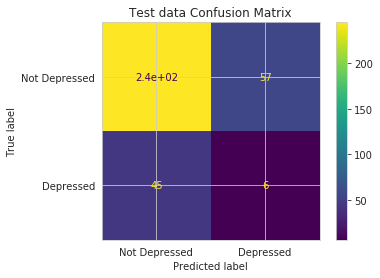

In [37]:
class_names = ['Not Depressed', 'Depressed']
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(best_svc, X_test_selected, y_test,  values_format = '.5g', display_labels=class_names)
plt.title("Test data Confusion Matrix")
plt.show()

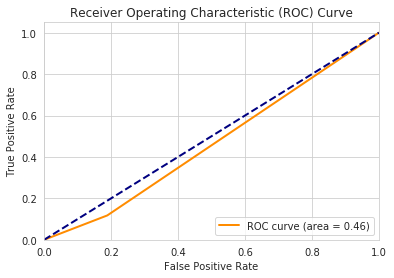

In [38]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Adjusting threshold to increase recall

In [39]:

y_pred_proba = best_svc.predict_proba(X_test_selected)[:,1]


threshold = 0.1

y_pred_adjusted = (y_pred_proba >= threshold).astype(int)


precision = precision_score(y_test, y_pred_adjusted)
recall = recall_score(y_test, y_pred_adjusted)

print("Precision with adjusted threshold:", precision)
print("Recall with adjusted threshold:", recall)


Precision with adjusted threshold: 0.14447592067988668
Recall with adjusted threshold: 1.0


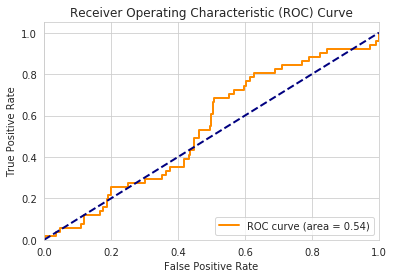

In [40]:

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)


y_pred_adjusted = (y_pred_proba >= threshold).astype(int)


roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### When SVC is used with PCA only, the time taken to converge is quite high. So, apart from PCA , Feature selection is also used to reduce the time taken to converge but here it is observed that the accuracy is above 60%, which is quite low on both training and testing dataset. It implies that the model is underfitting and not capturing the underlying patterns in the data well enough, resulting in poor performance on both the training and testing datasets. A more complex model is required so that the patterns are captured. Also, the recall value is quite low and increases after adjusting threshold. But AUC value  implies that model is performing poorly in classifying instances

#  Random Forest Classifier with PCA and feature importance

In [41]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)
rf_classifier = RandomForestClassifier(n_estimators=7, random_state=100, min_samples_split=2, min_samples_leaf=4)


pipeline = Pipeline([
    ('pca', PCA(n_components=5)), 
    ('select_from_model', SelectFromModel(estimator=rf_classifier))
])


pipeline.fit(X_train, y_train)


X_train_selected = pipeline.transform(X_train)
X_test_selected = pipeline.transform(X_test)


rf_classifier.fit(X_train_selected, y_train)

print("TRAIN RESULT:\n================================================")
y_train_selected = rf_classifier.predict(X_train_selected)
train_accuracy = accuracy_score(y_train, y_train_selected)*100
print("Train Accuracy:", train_accuracy)
print("_______________________________________________")


print("TEST RESULT:\n================================================")
y_test_selected= rf_classifier.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, y_test_selected)*100
print("Test Accuracy:", test_accuracy)
print("_______________________________________________")

print("CONFUSION MATRIX:\n================================================")
print(confusion_matrix(y_test,y_pred))
print("_______________________________________________")

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Precision :", precision)
print("Recall :", recall)

TRAIN RESULT:
Train Accuracy: 86.07954545454545
_______________________________________________
TEST RESULT:
Test Accuracy: 84.13597733711048
_______________________________________________
CONFUSION MATRIX:
[[245  57]
 [ 45   6]]
_______________________________________________
Precision : 0.09523809523809523
Recall : 0.11764705882352941


#### The accuracy of the model is moderately good on both train and test sets . The Recall value is low

In [42]:
from sklearn.model_selection import cross_val_score


cv_scores = cross_val_score(rf_classifier, X, y, cv=5)


print("Cross-Validation Scores:", cv_scores)


mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print("Mean CV score:", mean_cv_score)
print("Standard deviation of CV scores:", std_cv_score)


Cross-Validation Scores: [0.83333333 0.83333333 0.83333333 0.82978723 0.83274021]
Mean CV score: 0.832505489513137
Standard deviation of CV scores: 0.0013784037388326297


####  Model appears to have a mean cross-validation accuracy of approximately 83.39%, with relatively low variability between folds. This suggests that the model is performing consistently well across different subsets of the data, which is a positive indication of its generalization ability.

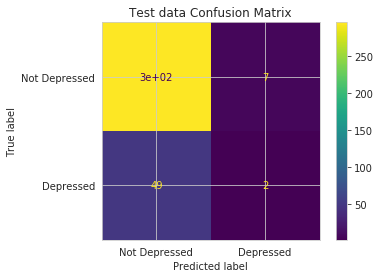

In [43]:
class_names = ['Not Depressed', 'Depressed']
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_classifier, X_test_selected, y_test,  values_format = '.5g', display_labels=class_names)
plt.title("Test data Confusion Matrix")
plt.show()

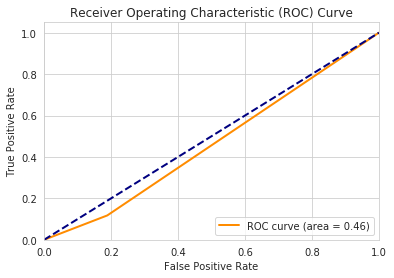

In [44]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Ajusting threshold to increase recall

In [45]:

y_pred_proba = rf_classifier.predict_proba(X_test_selected)[:,1]


threshold = 0.1

y_pred_adjusted = (y_pred_proba >= threshold).astype(int)


precision = precision_score(y_test, y_pred_adjusted)
recall = recall_score(y_test, y_pred_adjusted)

print("Precision with adjusted threshold:", precision)
print("Recall with adjusted threshold:", recall)


Precision with adjusted threshold: 0.15315315315315314
Recall with adjusted threshold: 0.6666666666666666


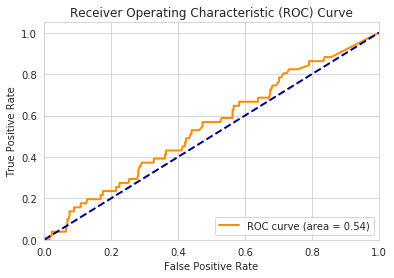

In [46]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)


y_pred_adjusted = (y_pred_proba >= threshold).astype(int)


roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Accuracy is only moderately good. Model is able to predict only few TRUE POSITIVES while FALSE POSITIVE is very large comparatively which can become very risky in a medical scenario. The recall value is quite low. The recall value is more important so that the number of FALSE NEGATIVES come down, which is essential. So, the threshold is adjusted to increase the recall value. The AUC value shows that the model may struggle to correctly classify instances or discriminate between the classes effectively.

# INFERENCE
#### K-Nearest Neighbours is achieving accuracy above 80% for both training and testing data but isn't able to classify positives well. The complexity of KNN depends on the number of training instances and ,here, the dataset is smaller so it is giving better accuracy than other models. However, the AUC value shows that the model is not doing good at classifying instances
#### Support Vector Classifier(SVC) is underfitting which implies model is too simple to capture the underlying patters. 
#### To increase model complexity, Random Forest Classifier is used with Principal Component Analysis(PCA) as well as Feature Importance but the models are showing only moderately good accuracy. More training data can help cover a wider range of scenarios and variations present in the features, and, hence increase accuracy. This allows the model to learn more robust patterns and generalizable representations of the data, reducing the risk of memorizing specific instances, and leading to improved performance on unseen data and overcome overfitting.

#### In the field of medical science,  accuracy alone is not the best metric for evaluating depression detection models because the dataset might be imbalanced (i.e., more non-depressed individuals than depressed ones), leading to a high accuracy even if the model performs poorly on detecting depression cases. Instead, metrics like sensitivity (true positive rate), specificity (true negative rate), precision (positive predictive value) are often used to evaluate the performance of binary classification models  used in depression detection.

## FUTURE ASPECTS
#### Furthermore, depression detection is a complex and multifaceted task that cannot be based only on demographics. It requires structured data (e.g., demographic information, questionnaire responses) but also unstructured data (e.g., text from social media posts, audio recordings of speech). The living conditions alone cannot be an indicator of depression. We would also need an insight into the regular habits eg. hobbies, social media etc. Detection of depression will be, comparatively, more accurate if both types of data are combined. If the input contains different types of data then Deep Learning models need to be used to evaluate.
#### In the future, I would like to build a model to analyse and detect depression, and build a function in a smart watch or an application in the phone which gives positive/motivational reminders to people to help people deal with depression, along with medical guidance, and guide them to a positive lifestyle 

# REFERENCE

 Dataset has been taken from Kaggle